# Writing your own functions

In [1]:
# Define shout_all with parameters word1 and word2
def shout_all(word1, word2):
    """This area belongs to docstring"""
    # Concatenate word1 with '!!!': shout1
    shout1 = word1 + '!!!'
    
    # Concatenate word2 with '!!!': shout2
    shout2 = word2 + '!!!'
    
    # Construct a tuple with shout1 and shout2: shout_words
    shout_words = (shout1, shout2)

    # Return shout_words
    return shout_words

# Pass 'congratulations' and 'you' to shout_all(): yell1, yell2
yell1, yell2 = shout_all('congratulations', 'you')

# Print yell1 and yell2
print(yell1)
print(yell2)
print(shout_all.__doc__)

congratulations!!!
you!!!
This area belongs to docstring


In [2]:
import pandas as pd
tweets_df = pd.read_csv('data/tweets.csv')


# Define count_entries()
def count_entries(df, col_name):
    """Return a dictionary with counts of 
    occurrences as value for each key."""

    # Initialize an empty dictionary: langs_count
    langs_count = {}
    
    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over lang column in DataFrame
    for entry in col:

        # If the language is in langs_count, add 1 
        if entry in langs_count.keys():
            langs_count[entry] += 1
        # Else add the language to langs_count, set the value to 1
        else:
            langs_count[entry] = 1

    # Return the langs_count dictionary
    return langs_count

# Call count_entries(): result
result = count_entries(tweets_df, 'lang')

# Print the result
print(result)

{'en': 97, 'et': 1, 'und': 2}


# Default arguments, variable-length arguments and scope

In [3]:
# Define three_shouts
def three_shouts(word1, word2, word3):
    """Returns a tuple of strings
    concatenated with '!!!'."""

    # Define inner
    def inner(word):
        """Returns a string concatenated with '!!!'."""
        return word + '!!!'

    # Return a tuple of strings
    return (inner(word1), inner(word2), inner(word3))

# Call three_shouts() and print
print(three_shouts('a', 'b', 'c'))

('a!!!', 'b!!!', 'c!!!')


In [4]:
# Define echo
def echo(n):
    """Return the inner_echo function."""

    # Define inner_echo
    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word

    # Return inner_echo
    return inner_echo

# Call echo: twice
twice = echo(2)

# Call echo: thrice
thrice = echo(3)

# Call twice() and thrice() then print
print(twice('hello'), thrice('hello'))

hellohello hellohellohello


In [5]:
# Define echo_shout()
def echo_shout(word):
    """Change the value of a nonlocal variable"""
    
    # Concatenate word with itself: echo_word
    echo_word = word * 2
    
    # Print echo_word
    print(echo_word)
    
    # Define inner function shout()
    def shout():
        """Alter a variable in the enclosing scope"""    
        # Use echo_word in nonlocal scope
        nonlocal echo_word
        
        # Change echo_word to echo_word concatenated with '!!!'
        echo_word = echo_word + '!!!'
    
    # Call function shout()
    shout()
    
    # Print echo_word
    print(echo_word)

# Call function echo_shout() with argument 'hello'
echo_shout('hello')

hellohello
hellohello!!!


In [6]:
# Define gibberish
def gibberish(*args):
    """Concatenate strings in *args together."""

    # Initialize an empty string: hodgepodge
    hodgepodge = ''

    # Concatenate the strings in args
    for word in args:
        hodgepodge += word

    # Return hodgepodge
    return hodgepodge

# Call gibberish() with one string: one_word
one_word = gibberish('luke')

# Call gibberish() with five strings: many_words
many_words = gibberish("luke", "leia", "han", "obi", "darth")

# Print one_word and many_words
print(one_word)
print(many_words)

luke
lukeleiahanobidarth


In [7]:
# Define report_status
def report_status(**kwargs):
    """Print out the status of a movie character."""

    print("\nBEGIN: REPORT\n")

    # Iterate over the key-value pairs of kwargs
    for key, value in kwargs.items():
        # Print out the keys and values, separated by a colon ':'
        print(key + ": " + value)

    print("\nEND REPORT")

# First call to report_status()
report_status(name = 'luke', affiliation="jedi", status="missing")

# Second call to report_status()
report_status(name='anakin', affiliation='sith lord', status='deceased')


BEGIN: REPORT

name: luke
affiliation: jedi
status: missing

END REPORT

BEGIN: REPORT

name: anakin
affiliation: sith lord
status: deceased

END REPORT


In [8]:
# Define count_entries()
def count_entries(df, col_name = 'lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: cols_count
    cols_count = {}

    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1

        # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1

    # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df)

# Call count_entries(): result2
result2 = count_entries(tweets_df, 'source')

# Print result1 and result2
print(result1)
print(result2)

{'en': 97, 'et': 1, 'und': 2}
{'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 24, '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>': 1, '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>': 26, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 33, '<a href="http://www.twitter.com" rel="nofollow">Twitter for BlackBerry</a>': 2, '<a href="http://www.google.com/" rel="nofollow">Google</a>': 2, '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>': 6, '<a href="http://linkis.com" rel="nofollow">Linkis.com</a>': 2, '<a href="http://rutracker.org/forum/viewforum.php?f=93" rel="nofollow">newzlasz</a>': 2, '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>': 1, '<a href="http://www.myplume.com/" rel="nofollow">Plume\xa0for\xa0Android</a>': 1}


In [9]:
# Define count_entries()
def count_entries(df, *args):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    #Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Iterate over column names in args
    for col_name in args:
    
        # Extract column from DataFrame: col
        col = df[col_name]
    
        # Iterate over the column in DataFrame
        for entry in col:
    
            # If entry is in cols_count, add 1
            if entry in cols_count.keys():
                cols_count[entry] += 1
    
            # Else add the entry to cols_count, set the value to 1
            else:
                cols_count[entry] = 1

    # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, 'lang')

# Call count_entries(): result2
result2 = count_entries(tweets_df, 'lang', 'source')

# Print result1 and result2
print(result1)
print(result2)

{'en': 97, 'et': 1, 'und': 2}
{'en': 97, 'et': 1, 'und': 2, '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 24, '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>': 1, '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>': 26, '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 33, '<a href="http://www.twitter.com" rel="nofollow">Twitter for BlackBerry</a>': 2, '<a href="http://www.google.com/" rel="nofollow">Google</a>': 2, '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>': 6, '<a href="http://linkis.com" rel="nofollow">Linkis.com</a>': 2, '<a href="http://rutracker.org/forum/viewforum.php?f=93" rel="nofollow">newzlasz</a>': 2, '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>': 1, '<a href="http://www.myplume.com/" rel="nofollow">Plume\xa0for\xa0Android</a>': 1}


# Lambda functions and error-handling

In [10]:
# Define echo_word as a lambda function: echo_word
echo_word = (lambda word1, echo: word1 * echo)

# Call echo_word: result
result = echo_word('hey', 5)

# Print result
print(result)

heyheyheyheyhey


In [11]:
# Create a list of strings: spells
spells = ["protego", "accio", "expecto patronum", "legilimens"]

# Use map() to apply a lambda function over spells: shout_spells
shout_spells = map(lambda x: x + '!!!', spells)

# Convert shout_spells to a list: shout_spells_list
shout_spells_list = list(shout_spells)

# Print the result
print(shout_spells_list)

['protego!!!', 'accio!!!', 'expecto patronum!!!', 'legilimens!!!']


In [12]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'pippin', 'aragorn', 'boromir', 'legolas', 'gimli', 'gandalf']

# Use filter() to apply a lambda function over fellowship: result (have more than 6 characters.)
result = filter(lambda x: len(x) > 6, fellowship)

# Convert result to a list: result_list
result_list = list(result)

# Print result_list
print(result_list)

['samwise', 'aragorn', 'boromir', 'legolas', 'gandalf']


In [13]:
# Import reduce from functools
from functools import reduce

# Create a list of strings: stark
stark = ['robb', 'sansa', 'arya', 'brandon', 'rickon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda item1, item2: item1+item2 , stark)

# Print the result
print(result)

robbsansaaryabrandonrickon


In [14]:
# Define shout_echo
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Initialize empty strings: echo_word, shout_words
    echo_word = ''
    shout_words = ''

    # Add exception handling with try-except
    try:
        # Concatenate echo copies of word1 using *: echo_word
        echo_word = word1 * echo

        # Concatenate '!!!' to echo_word: shout_words
        shout_words = echo_word + '!!!'
    except:
        # Print error message
        print("word1 must be a string and echo must be an integer.")

    # Return shout_words
    return shout_words

# Call shout_echo
shout_echo("particle", echo="accelerator")

word1 must be a string and echo must be an integer.


''

In [15]:
# Define shout_echo
def shout_echo(word1, echo=1):
    """Concatenate echo copies of word1 and three
    exclamation marks at the end of the string."""

    # Raise an error with raise
    if echo < 0:
        raise ValueError('echo must be greater than or equal to 0')

    # Concatenate echo copies of word1 using *: echo_word
    echo_word = word1 * echo

    # Concatenate '!!!' to echo_word: shout_word
    shout_word = echo_word + '!!!'

    # Return shout_word
    return shout_word

# Call shout_echo
shout_echo("particle", echo=5)

'particleparticleparticleparticleparticle!!!'

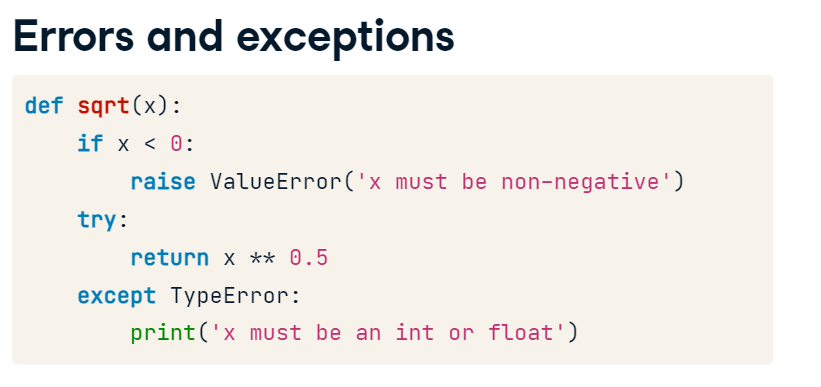

In [16]:
# Select retweets from the Twitter DataFrame: result
result = filter(lambda x: x[:2] == 'RT', tweets_df['text'])

# Create list from filter object result: res_list
res_list = list(result)

# Print all retweets in res_list
for tweet in res_list:
    print(tweet)

RT @bpolitics: .@krollbondrating's Christopher Whalen says Clinton is the weakest Dem candidate in 50 years https://t.co/pLk7rvoRSn https:/…
RT @HeidiAlpine: @dmartosko Cruz video found.....racing from the scene.... #cruzsexscandal https://t.co/zuAPZfQDk3
RT @AlanLohner: The anti-American D.C. elites despise Trump for his America-first foreign policy. Trump threatens their gravy train. https:…
RT @BIackPplTweets: Young Donald trump meets his neighbor  https://t.co/RFlu17Z1eE
RT @trumpresearch: @WaitingInBagdad @thehill Trump supporters have selective amnisia.
RT @HouseCracka: 29,000+ PEOPLE WATCHING TRUMP LIVE ON ONE STREAM!!!

https://t.co/7QCFz9ehNe
RT @urfavandtrump: RT for Brendon Urie
Fav for Donald Trump https://t.co/PZ5vS94lOg
RT @trapgrampa: This is how I see #Trump every time he speaks. https://t.co/fYSiHNS0nT
RT @trumpresearch: @WaitingInBagdad @thehill Trump supporters have selective amnisia.
RT @Pjw20161951: NO KIDDING: #SleazyDonald just attacked Scott Walker for NOT RAISI

In [17]:
# Define count_entries()
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""

    # Initialize an empty dictionary: cols_count
    cols_count = {}

    # Add try block
    try:
        # Extract column from DataFrame: col
        col = df[col_name]
        
        # Iterate over the column in DataFrame
        for entry in col:
    
            # If entry is in cols_count, add 1
            if entry in cols_count.keys():
                cols_count[entry] += 1
            # Else add the entry to cols_count, set the value to 1
            else:
                cols_count[entry] = 1
    
        # Return the cols_count dictionary
        return cols_count

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

# Call count_entries(): result1
result1 = count_entries(tweets_df, 'lang')

# Print result1
print(result1)

{'en': 97, 'et': 1, 'und': 2}


In [18]:
# Define count_entries()
def count_entries(df, col_name='lang'):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Raise a ValueError if col_name is NOT in DataFrame
    if col_name not in df.columns:
        raise ValueError('The DataFrame does not have a ' + col_name + ' column.')

    # Initialize an empty dictionary: cols_count
    cols_count = {}
    
    # Extract column from DataFrame: col
    col = df[col_name]
    
    # Iterate over the column in DataFrame
    for entry in col:

        # If entry is in cols_count, add 1
        if entry in cols_count.keys():
            cols_count[entry] += 1
            # Else add the entry to cols_count, set the value to 1
        else:
            cols_count[entry] = 1
        
        # Return the cols_count dictionary
    return cols_count

# Call count_entries(): result1
result1 = count_entries(tweets_df, 'lang')

# Print result1
print(result1)

{'en': 97, 'et': 1, 'und': 2}
